In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [4]:
text = """Shall I compare thee to a summer's day?
Thou art more lovely and more temperate.
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date."""

In [5]:
corpus = text.lower().split("\n")

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [7]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [8]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [9]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.eye(total_words)[y] 

In [10]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(SimpleRNN(50))
model.add(Dense(total_words, activation='softmax'))

e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0345 - loss: 3.3948
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0690 - loss: 3.3829
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1379 - loss: 3.3710
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1034 - loss: 3.3589
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2069 - loss: 3.3465
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2414 - loss: 3.3335
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2069 - loss: 3.3200
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2069 - loss: 3.3058
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2414 - loss: 3.2907
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2414 - loss: 3.2747
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2414 - loss: 3.2577
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2414 - loss

In [13]:
seed_text = "the sun is"
next_words = 1

In [14]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [15]:
print("Predicted next word sequence:", seed_text)

Predicted next word sequence: the sun is art


In [16]:
df = pd.read_csv('GOOG.csv')   # <-- apna CSV path yahan
df = df[['Close']]                     # Close price use karenge
df.head()

,Close
0,2.499133
1,2.697639
2,2.724787
3,2.611960
4,2.640104


In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


In [18]:
X, y = [], []
seq_len = 60
for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [19]:
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [20]:
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1],1)),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4527e-05
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6564e-05
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3468e-05
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3944e-05
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5174e-05
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3040e-05
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4280e-05
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6922e-05
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6695e-05
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5018e-05
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8054e-05
Epoch 13/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8148e-05
Epoch 14/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5677e-05
Epoch

In [22]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


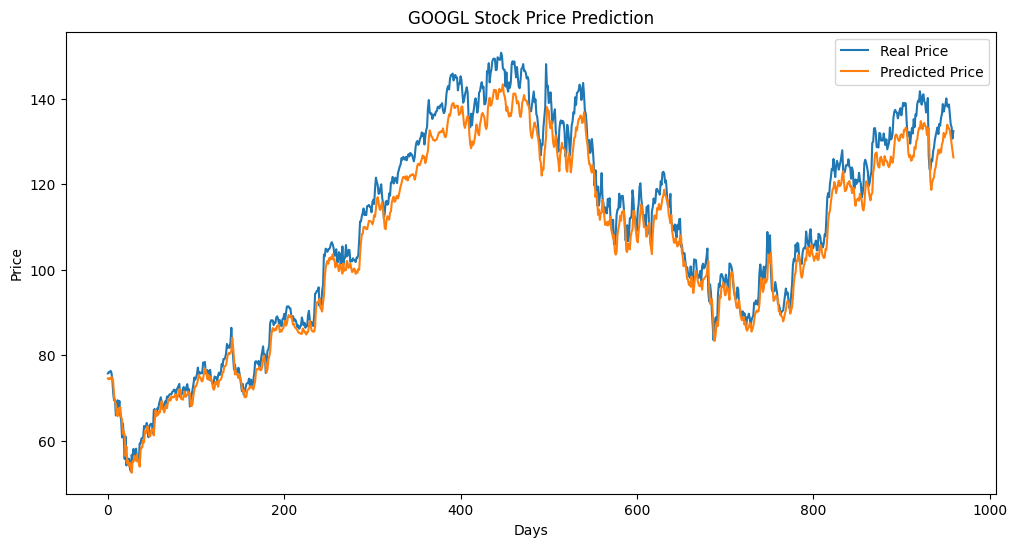

In [23]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Real Price')
plt.plot(predictions, label='Predicted Price')
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
df = pd.read_csv('imdb_reviews.csv') 

In [31]:
print(df.columns)

Index(['imdb_id', 'review title', 'review_rating', 'review'], dtype='object')


In [32]:
texts = df['review'].astype(str).tolist()                # Review text
# Convert review_rating to binary labels: >=6 = Positive, <=5 = Negative
labels = (df['review_rating'] >= 6).astype(int).values 

In [33]:
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = labels

In [34]:
split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [35]:
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8249 - loss: 0.4745 - val_accuracy: 0.8378 - val_loss: 0.4412
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8357 - loss: 0.4221 - val_accuracy: 0.8378 - val_loss: 0.4432
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8835 - loss: 0.2955 - val_accuracy: 0.7988 - val_loss: 0.4754
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9762 - loss: 0.1187 - val_accuracy: 0.8068 - val_loss: 0.4904
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9980 - loss: 0.0367 - val_accuracy: 0.7508 - val_loss: 0.5973


In [37]:
# 7. Evaluate on test data
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1]*100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7270 - loss: 0.6472
Test Accuracy: 72.70%


In [38]:
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(seq)[0][0]
    sentiment = "Positive" if pred>0.5 else "Negative"
    print(f"Review: {text}")
    print(f"Predicted Sentiment: {sentiment} ({pred:.2f})")

# Example
predict_review("This movie was absolutely amazing and so emotional!")
predict_review("Worst movie I have ever seen. Totally boring and slow.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Review: This movie was absolutely amazing and so emotional!
Predicted Sentiment: Positive (0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Review: Worst movie I have ever seen. Totally boring and slow.
Predicted Sentiment: Positive (0.67)
